In [2]:
import cv2
import numpy as np
from datascience import *
import matplotlib as mpl
from matplotlib import pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 120
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import pandas as pd
import statistics
import image_slicer
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv (r'Scale_Data_all.csv')
df = df.drop(columns = ['Average', 'Count Stander dev.'], axis = 1)
df['Quality:(1:best,3:worst)']

0     3
1     3
2     1
3     1
4     2
5     1
6     3
7     2
8     3
9     1
10    2
11    3
12    3
13    2
14    2
15    1
16    2
17    3
18    3
19    3
20    2
21    2
22    2
23    3
24    2
25    1
26    1
27    1
28    1
29    1
30    3
31    3
32    1
33    1
34    1
35    1
36    2
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
Name: Quality:(1:best,3:worst), dtype: int64

In [4]:
display(df[df['Quality:(1:best,3:worst)'] == '2'])



,Guanica County,Tanya Count,Comp count,% dif,Notes,"Quality:(1:best,3:worst)",Maggie Count,Charlie Count


Average absolute percent difference 0.0728752990009091
displayed


,Guanica County,variable,value
0,117702Ventral-NoFlash-1.png,Tanya Count,42.0
1,117702Ventral-NoFlash-2.png,Tanya Count,27.0
2,117702Ventral-NoFlash-4.png,Tanya Count,25.0
3,117704Ventral-NoFlash-2.png,Tanya Count,35.0
4,117716Ventral-NoFlash-4.png,Tanya Count,30.0
5,135182Dorsal-NoFlash-2.png,Tanya Count,132.0
6,135182Dorsal-NoFlash-3.png,Tanya Count,72.0
7,135182Ventral-NoFlash-1.png,Tanya Count,38.0
8,135182Ventral-NoFlash-2.png,Tanya Count,39.0
9,135182Ventral-NoFlash-3.png,Tanya Count,30.0


Text(0.5, 1.0, 'Counter vs Hand Counters')

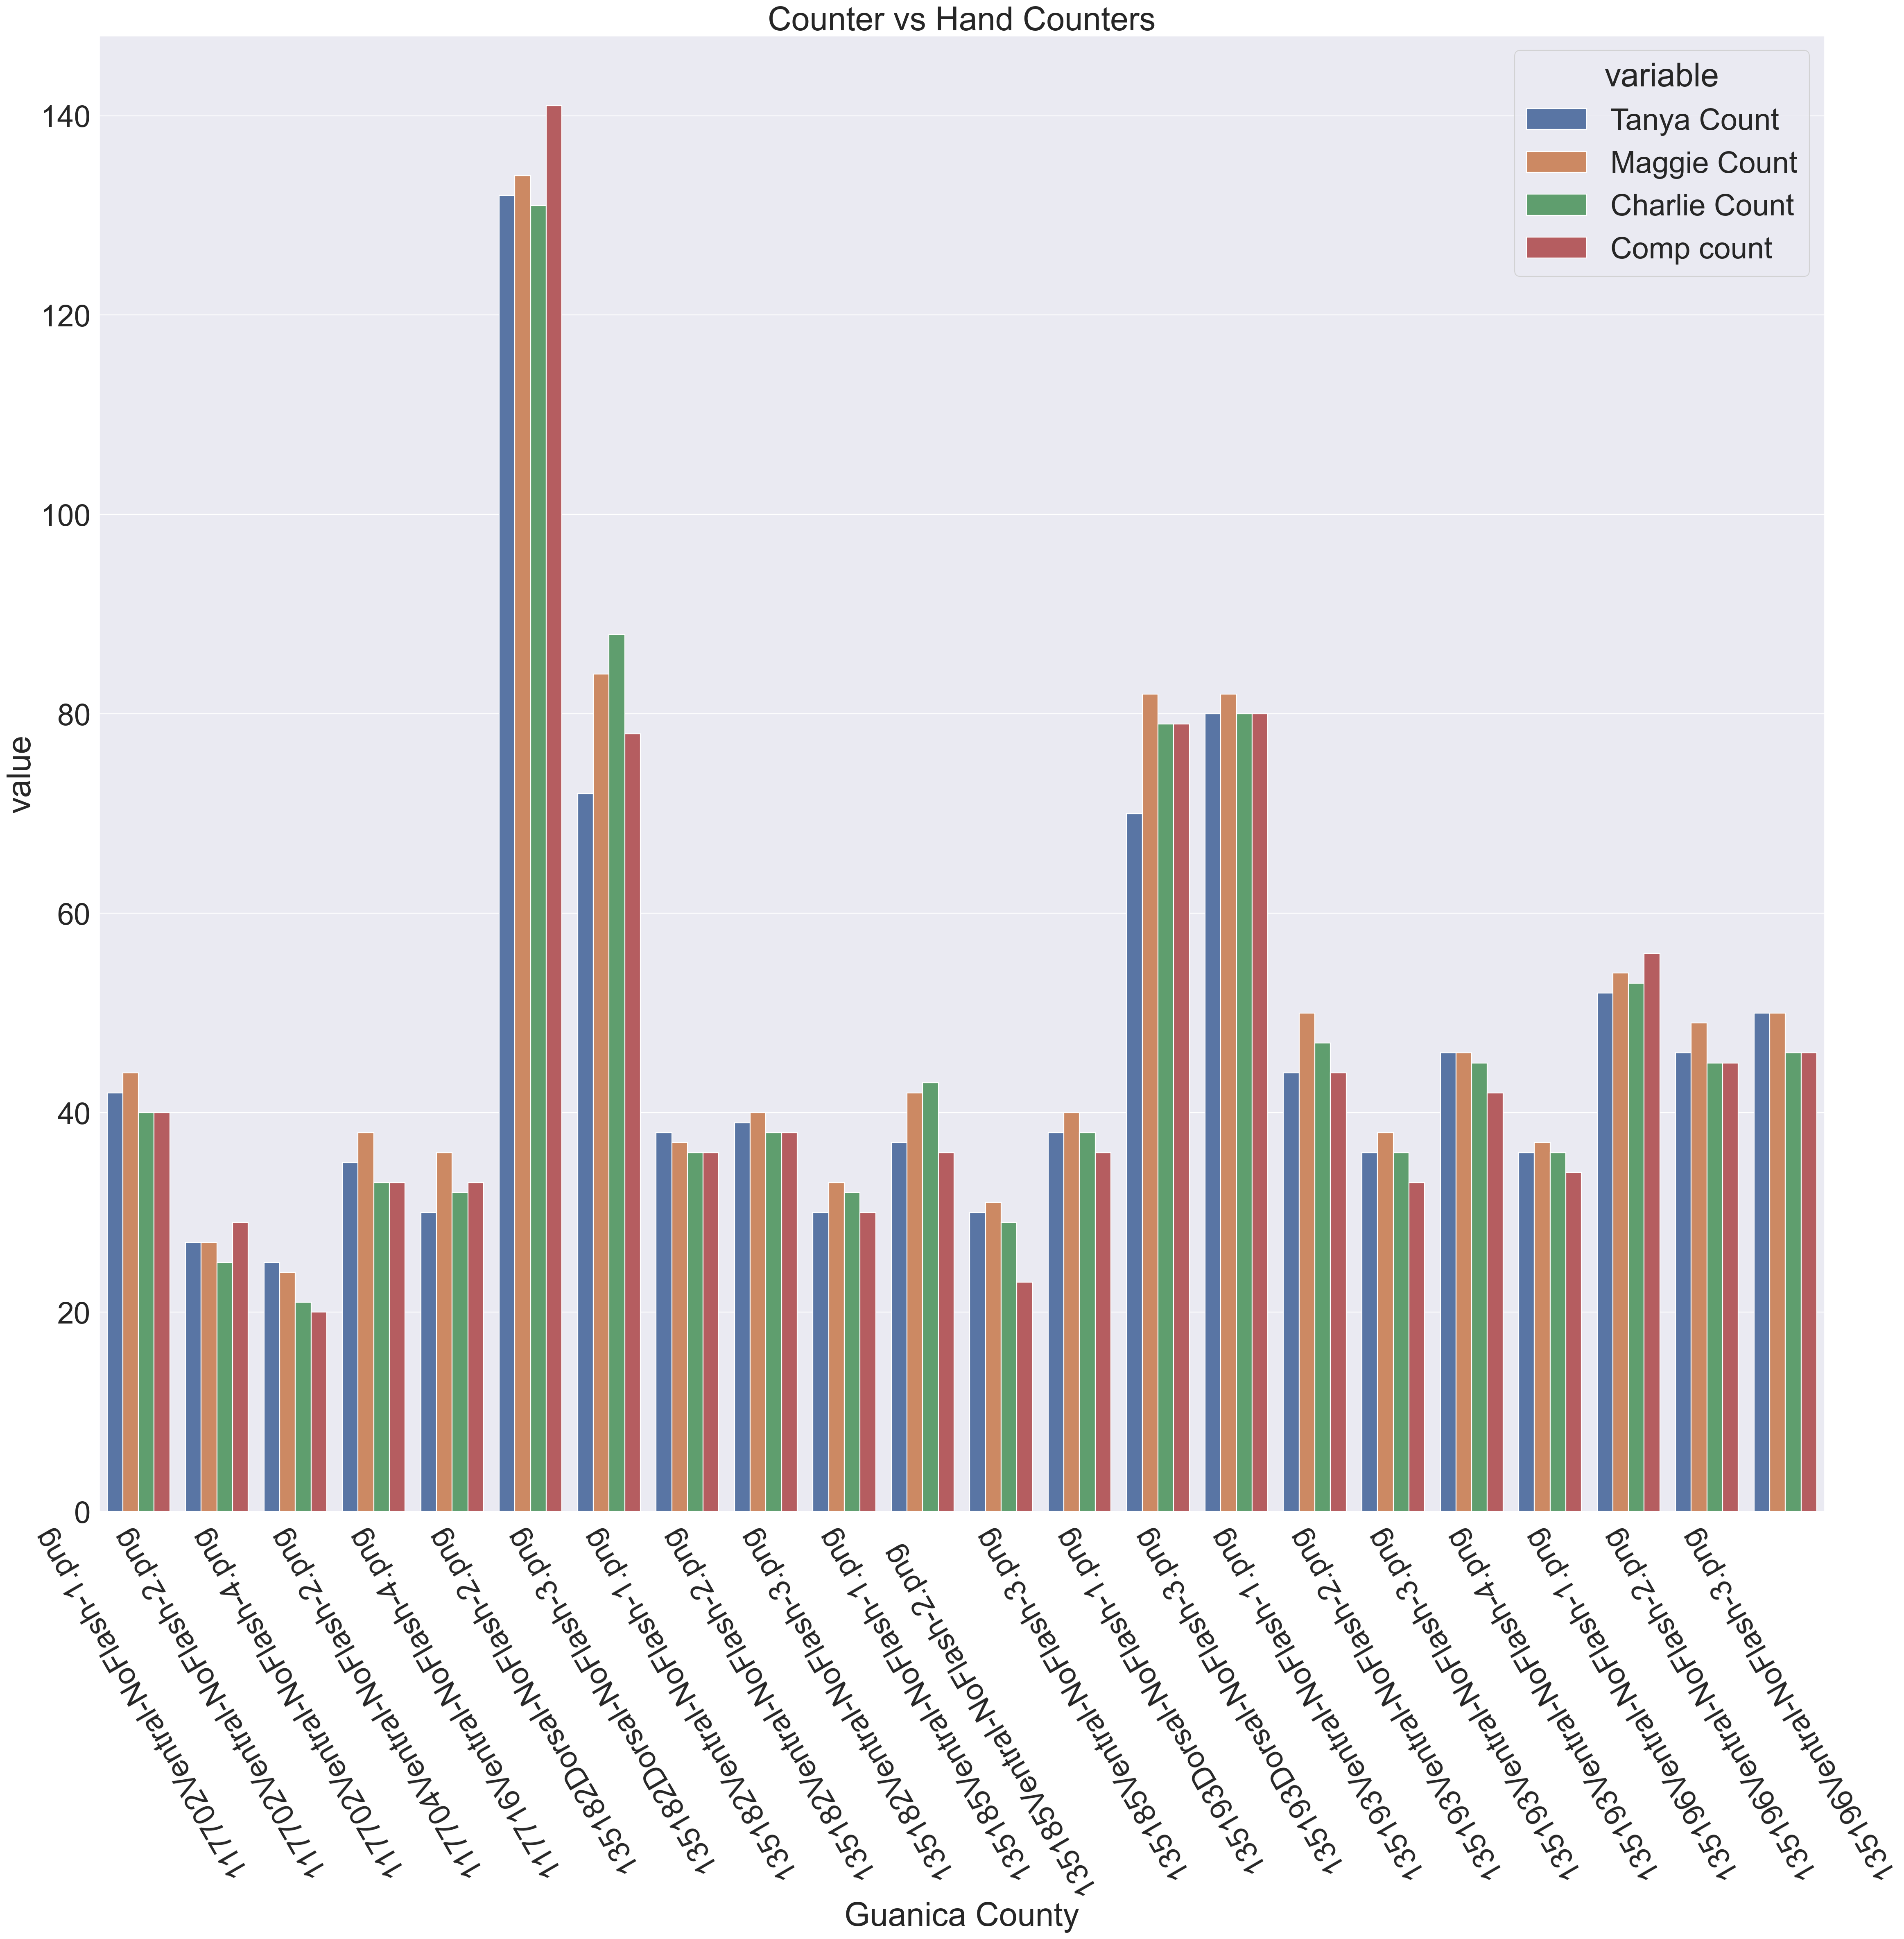

In [8]:



#this function constructs a table for configuring a graph where entries include only those of the indicated quality
def contstruct__tbl(df, quality):
    #entries for a specific name
    temp = df[df['Quality:(1:best,3:worst)'] == quality].loc[:, ['Guanica County','Tanya Count', 'Maggie Count', 'Charlie Count', 'Comp count']] 
    print('displayed')
    return temp



print('Average absolute percent difference', np.mean(abs(df[df['Quality:(1:best,3:worst)'] == 1]['% dif'])))
df1 = contstruct__tbl(df, 1)
df1 = df1.melt(id_vars = ['Guanica County'], value_vars = ['Tanya Count', 'Maggie Count', 'Charlie Count', 'Comp count'])

pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df1)

figure(figsize=(30, 30), dpi=80)

sns.set(font_scale = 3)
sns.barplot(hue = 'variable', data = df1, x = 'Guanica County', y = 'value')
plt.xticks(rotation=120)
plt.tight_layout()
plt.title('Counter vs Hand Counters')


Average absolute percent difference 0.0728752990009091


,Guanica County,Tanya Count,Comp count,% dif,Notes,"Quality:(1:best,3:worst)",Maggie Count,Charlie Count
2,117702Ventral-NoFlash-1.png,42,40,-0.048780,Good image: uneven size but good seperation,1,44,40.0
3,117702Ventral-NoFlash-2.png,27,29,0.071429,Harsh lighting but scales not illuminated in m...,1,27,25.0
5,117702Ventral-NoFlash-4.png,25,20,-0.222222,Good seperation. Some dark spots on scales,1,24,21.0
9,117704Ventral-NoFlash-2.png,35,33,-0.058824,Very good image,1,38,33.0
15,117716Ventral-NoFlash-4.png,30,33,0.095238,"Very good image, though a bit dark",1,36,32.0
25,135182Dorsal-NoFlash-2.png,132,141,0.065934,Very good image. Clearly defined scales even t...,1,134,131.0
26,135182Dorsal-NoFlash-3.png,72,78,0.080000,Very good image,1,84,88.0
27,135182Ventral-NoFlash-1.png,38,36,-0.054054,Very good image,1,37,36.0
28,135182Ventral-NoFlash-2.png,39,38,-0.025974,Very good image,1,40,38.0
29,135182Ventral-NoFlash-3.png,30,30,0.000000,Very good image,1,33,32.0


displayed


Text(0, 0.5, 'count')

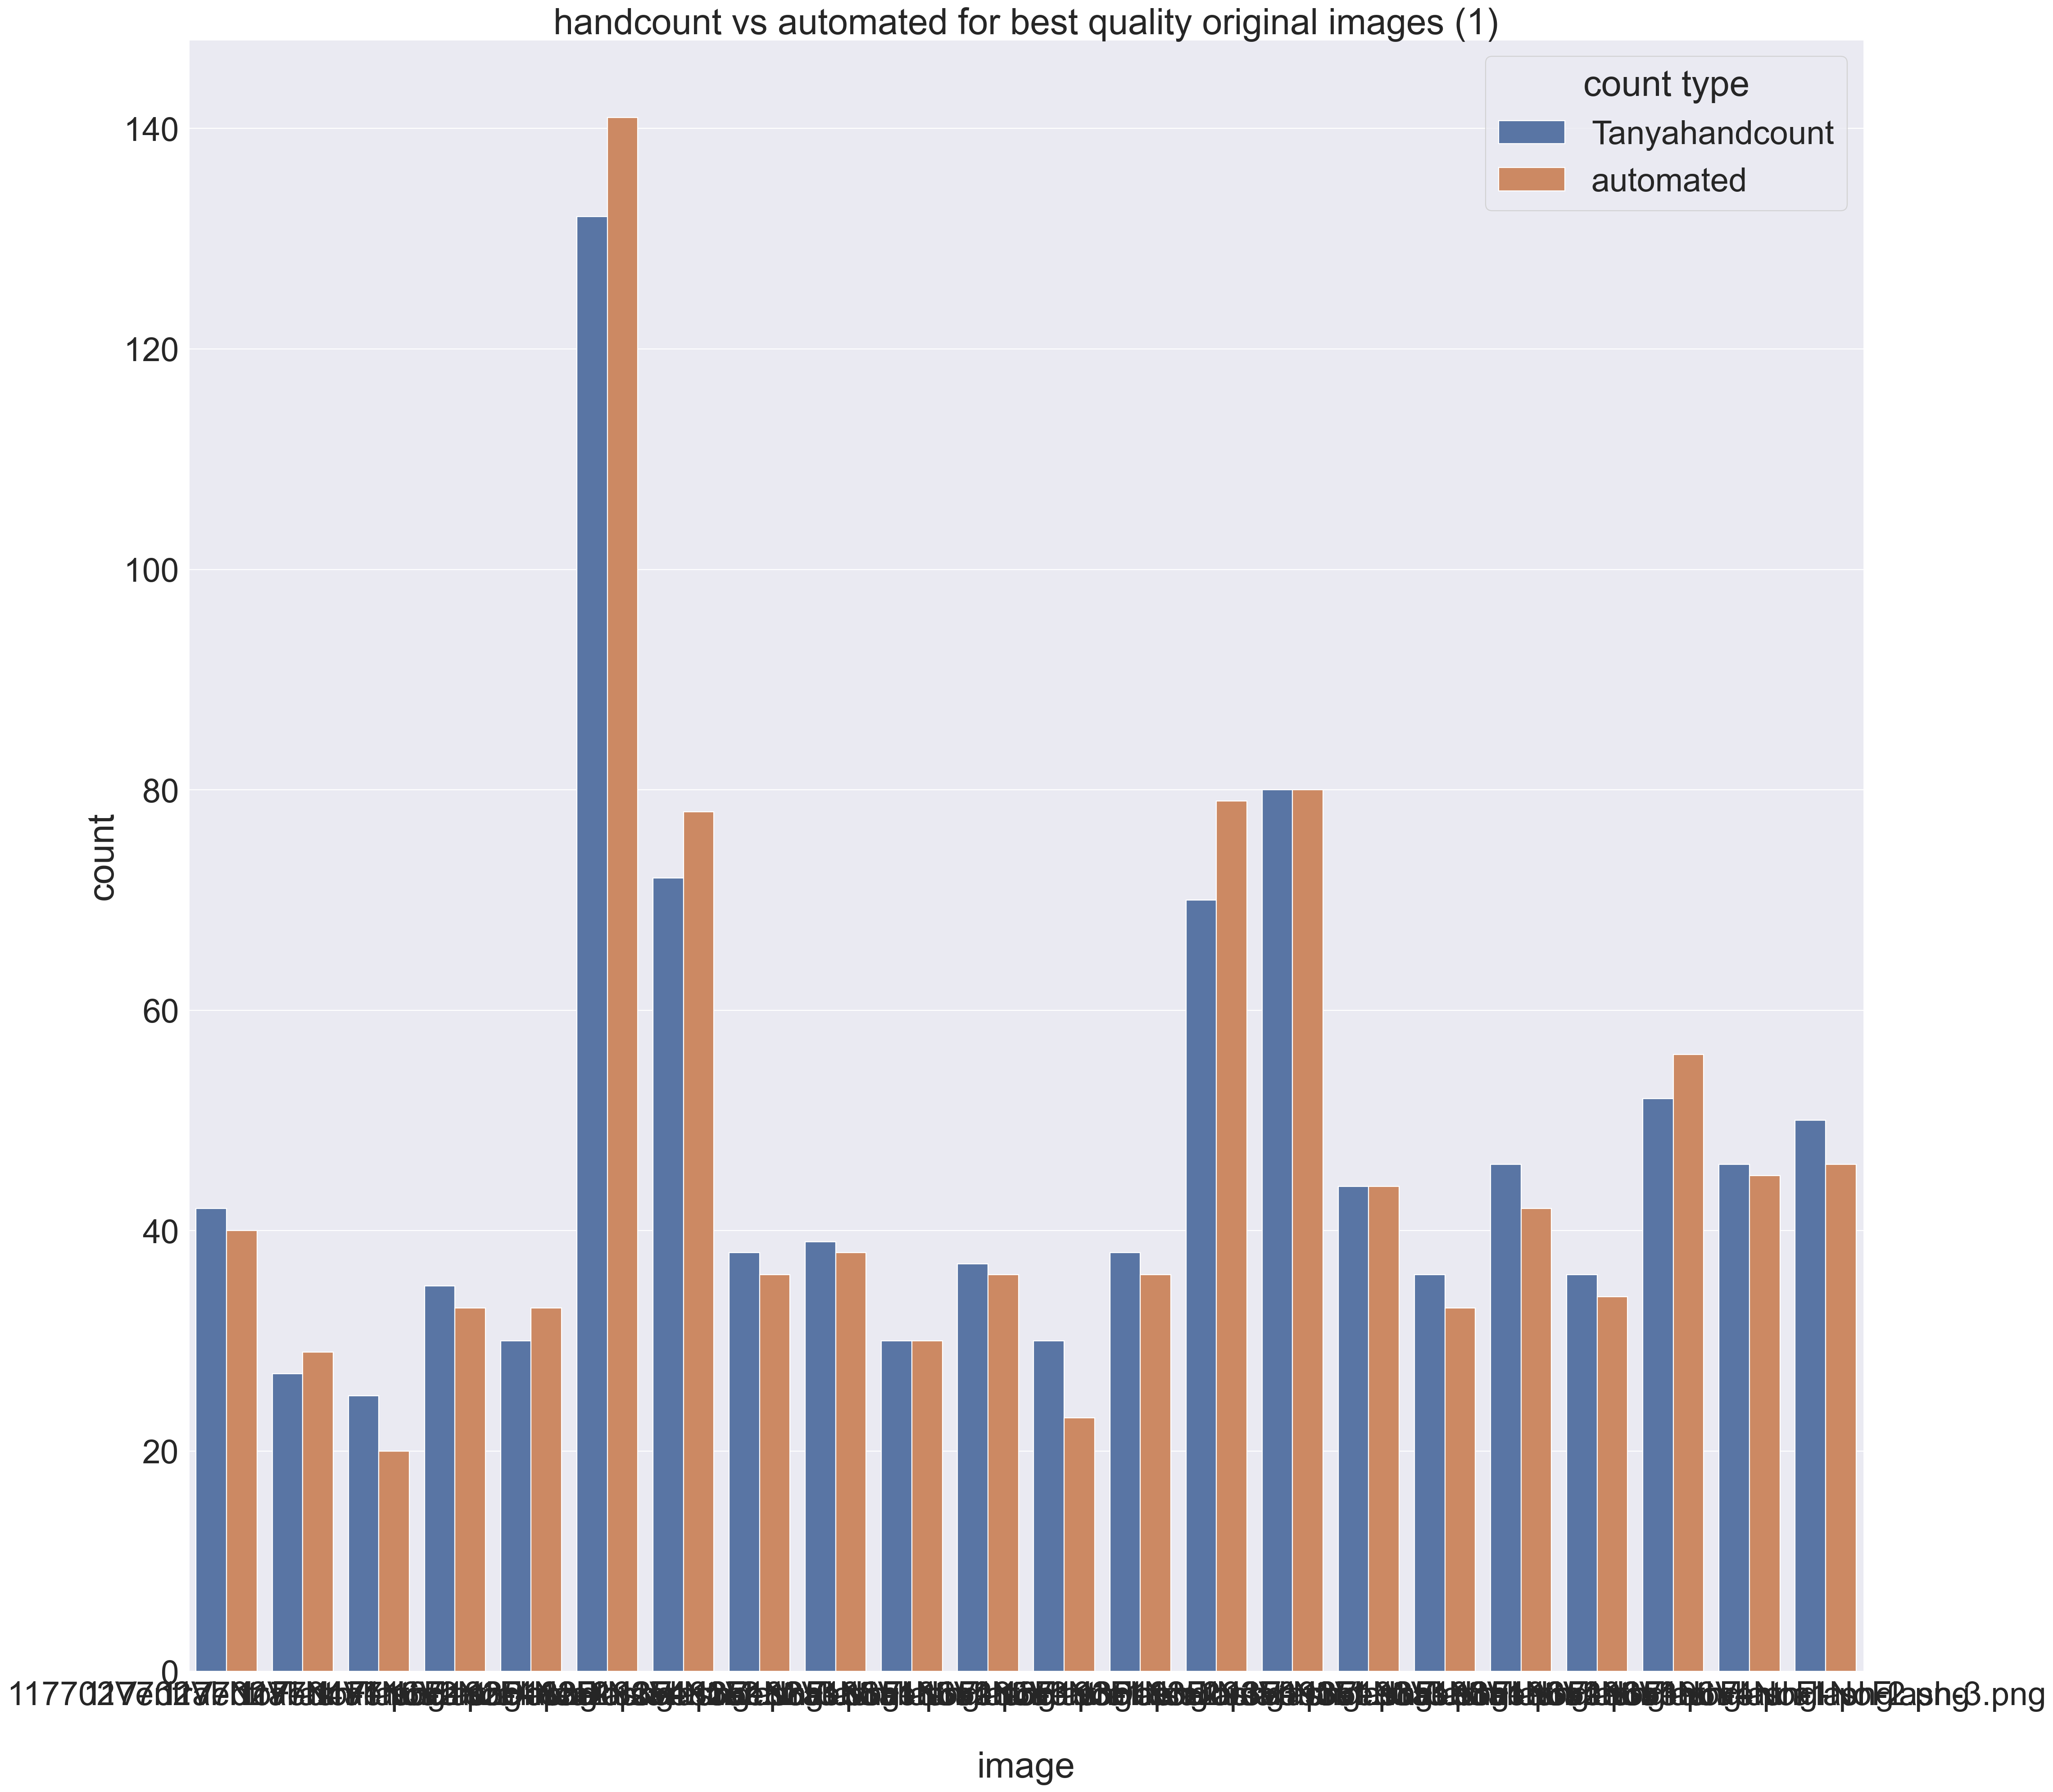

In [6]:
#this function constructs a table for configuring a graph where entries include only those of the indicated quality
def contstruct_tbl(df, quality, name):
    #entries for a specific name
    display(df[df['Quality:(1:best,3:worst)'] == quality])
    temp = df[df['Quality:(1:best,3:worst)'] == quality].loc[:, ['Guanica County', name + ' Count']] 
    temp['count type'] = [name +'handcount' for i in np.arange(len(temp))]
    temp = temp.rename(columns = {name + ' Count':'count'})
    print('displayed')
    
    #automated entries
    temp2 = df[df['Quality:(1:best,3:worst)'] == quality].loc[:, ['Guanica County', 'Comp count']] 
    temp2 = temp2.rename(columns = {'Comp count':'count'})
    temp2['count type'] = ['automated' for i in np.arange(len(temp2))]

    return pd.concat([temp, temp2])



print('Average absolute percent difference', np.mean(abs(df[df['Quality:(1:best,3:worst)'] == 1]['% dif'])))




figure(figsize=(30, 30), dpi=80)
df1 = contstruct_tbl(df, 1,'Tanya')
sns.barplot(x='Guanica County', y = 'count', data = df1, hue = 'count type')
plt.title('handcount vs automated for best quality original images (1)')
plt.xlabel('image')
plt.ylabel('count')

# #calculate regression??
# grouped = df1.sort_values(by = ['Tanya Count'])
# display(grouped)
# grouped = grouped.groupby(['Guanica County']).agg(list)
# display(grouped)
# sns.lmplot([i[0] for i in count])

In [7]:
df2 = contstruct_tbl(df, 2)
figure(figsize=(10, 10), dpi=80)
print('Average absolute percent difference', np.mean(abs(df[df['Quality:(1:best,3:worst)'] == 2]['% dif'])))
sns.barplot(x='Guanica County', y = 'count', data = df2, hue = 'count type')

TypeError: contstruct_tbl() missing 1 required positional argument: 'name'

In [62]:
df3 = contstruct_tbl(df, 3)
print('Average absolute percent difference', np.mean(abs(df[df['Quality:(1:best,3:worst)'] == 3]['% dif'])))
figure(figsize=(10, 10), dpi=80)
sns.barplot(x='Guanica County', y = 'count', data = df3, hue = 'count type')

TypeError: contstruct_tbl() missing 1 required positional argument: 'name'

In [ ]:
'''How to compare counts statistically?: Possian contingency?'''